# Data Analysis for Assignment 6 

## Initial Data Exploration Notebook: 

### In this notebook(11/09): ###


1. What are the dimensions (number of rows and columns) of the data frame?

2. What does each row represent?

3. What do the columns mean?

4. Rename columns if necessary (e.g. no spaces, reasonable length, understandable)

5. Examine the distribution (i.e., the range or type of values in the key columns of interest)

6. If relevant visualize the data (e.g. plot a histogram, plot a line graph, etc.)

7. What observations and questions do you have after exploring your data?

### In this notebook(11/13): ###

1. cleaning data further and responding to FB comments  
2. _question-steps-code-answer-interpretation/observation_ sequence:
    1. What is the question you are going to answer in this block, e.g.
        * _How many crashes in Philadelphia in 2013 involved SUVs or large trucks?_
        * _What border sector reported the highest migrant deaths overall for the fiscal years 2011-2018 
                OQ:which zipcodes reported the highest proportion of children with high lead blood levels?_
        * _Is the proportion of the population living in urban areas increasing in counties in the African continent?_
       
       _(The typology of kinds of data story components can be helpful. Try to use a number of the different kinds)_
       
    2. Lay out the conceptual analysis steps to go from your data to the answer. Do this in bullet points in Markdown, e.g. for the first question above, these would be:
       1. _Create filters for rows where `year` is 2013 and `SUV_count` or `large_truck_count` greater than 0_
       2. _Subset the complete crash data frame_
       3. _Count the number of rows_
    3. Implement these steps in one or more code cell(s). Remember to include comments, e.g.:
       ```
       # Create filters for rows where `year` is 2013 and `SUV_count` or `large_truck_count` greater than 0
       y2013_filter = crash_df['year']==2013
       suv_filter = crash_df['SUV_count']>0
       large_truck_filter = crash_df['large_truck_count']>0
       
       # Subset the complete crash data frame
       suv_truck_2013_df = crash_df[(y2013_filter) & (suv_filter | large_truck_filter)]
       
       # Count the number of rows
       crash_num = suv_truck_2013_df.shape[0]
       ```
    4. State the answer in narrative form.
    5. Add some observations and interpretations of what you have found. Also remember to note follow up questions that become relevant after answering the question.
    

Importing Pandas and Importing the Dataset

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import math
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Exploration of drug and firearm apprehensions/seizures data FY 2011-2018

* Data file: `apprehensions_seizures_stats_2011_2018.csv`

In [2]:
apprehension_df = pd.read_csv('../data/apprehensions_seizures_stats_2011_2018.csv')

In [3]:
apprehension_df.shape

(32, 21)

In [4]:
apprehension_df

,sector,fiscal_year,aliens_special_interest_county,ammunition_rounds,apprehensions,cocaine_pounds,cocaine_seizures,conveyances,currency_in_dollars,ecstasy_pounds,...,firearms,heroin_ounces,heroin_seizures,marijuana_pounds,marijuana_seizures,methamphetamine_pounds,methamphetamine_seizures,other_drugs_pounds,other_drugs_seizures,other_than_mexican_apprehensions
0,coastal border,2018,NaN,274,3247,1701,58,79,131976,0,...,17,4,3,731,99,3,8,26,22,2297
1,northern border,2018,NaN,344,4316,10,48,119,378302,0,...,73,54,31,1465,437,9,42,33,82,2071
2,southwest border,2018,NaN,18302,396579,4838,453,8391,6665864,1,...,314,11302,204,458834,7505,10273,897,891,769,244322
3,nationwide total,2018,NaN,18920,404142,6550,559,8589,7176142,2,...,404,11314,238,461030,8041,10328,947,951,873,248690
4,coastal border,2017,NaN,217,3588,3169,33,86,325129,0,...,9,0,0,2277,113,23,2,0,6,2561
5,northern border,2017,NaN,384,3027,3,46,79,374282,0,...,45,62,29,1066,255,32,68,14,99,1538
6,southwest border,2017,NaN,13938,303916,6174,463,7388,5169593,1,...,369,15182,219,857888,9371,10273,809,554,735,175978
7,nationwide total,2017,NaN,14539,310531,9346,542,7553,5869004,1,...,423,15244,248,861231,9739,10328,879,568,840,180077
8,coastal border,2016,NaN,127,4663,1288,31,84,72351,0,...,10,87,1,1232,90,0,4,0,1,3623
9,northern border,2016,NaN,669,2283,2,18,102,199797,7,...,50,14,22,714,214,8,38,190,46,1114


* shows the data aggregated by border, not really interested in it because I'm honing in on the southwest border and its checkpoints, but good to see overall data for the southwest border 


In [9]:
apprehension_df['sector'].unique()

array(['coastal border', 'northern border', 'southwest border',
       'nationwide total'], dtype=object)

* 3 borders with sectors making up each border. Focusing on SW border 

*Coastal Border:
```
Livermore (closed after fiscal year 2004)
Miami
New Orleans
Ramey
```
*Northern Border:
```
Blaine 
Buffalo
Detroit
Grand Forks
Havre
Houlton
Spokane
```
*Southwest Border:
```Big Bend
Del Rio
El Centro
El Paso
Laredo
Rio Grande Valley
San Diego
Tucson
Yuma
```

In [10]:
apprehension_df['fiscal_year'].unique()

array([2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011])

* Fiscal years ranging from 2011 to 2018 

### Exploration of family and child apprehension data 2000-2018 (for every sector and aggregated border)

* Data file: `family_child_total_monthly_2000_2018.csv`

In [133]:
family_df = pd.read_csv('../data/family_child_total_monthly_2000_2018.csv')

In [134]:
family_df.shape


(6006, 6)

In [135]:
family_df.columns

Index(['sector', 'fiscal_year', 'month', 'total_apprehensions',
       'unaccompanied_child_apprehension', 'family_apprehensions'],
      dtype='object')

In [143]:
family_df.sample(5)


,sector,fiscal_year,month,total_apprehensions,unaccompanied_child_apprehension,family_apprehensions
4706,big bend,2003,october,754.0,NaN,NaN
936,big bend,2015,october,302.0,13.0,30.0
5198,livermore,2002,september,325.0,NaN,NaN
4259,new orleans,2005,june,69.0,NaN,NaN
4355,tucson,2005,october,31940.0,NaN,NaN


In [127]:
family_df

,sector,fiscal_year,month,total_apprehensions,unaccompanied_child_apprehension,family_apprehensions
0,big bend,2018,october,819.0,126.0,109.0
1,big bend,2018,november,828.0,148.0,120.0
2,big bend,2018,december,802.0,140.0,113.0
3,big bend,2018,january,543.0,66.0,21.0
4,big bend,2018,february,838.0,76.0,18.0
...,...,...,...,...,...,...
6001,yuma,2000,june,6953.0,NaN,NaN
6002,yuma,2000,july,6228.0,NaN,NaN
6003,yuma,2000,august,6753.0,NaN,NaN
6004,yuma,2000,september,5145.0,NaN,NaN


* shows the data for total family apprehensions, broken down into accompanied apprehensions(family apprehensions) and unaccompanied child apprehensions for fiscal year by sector. data is organized by sector(alphabetized) and year(most recent year first).

In [16]:
family_df['unaccompanied_child_apprehension'].describe()

count     2807.000000
mean       765.479872
std       3899.284917
min          0.000000
25%          0.000000
50%          6.000000
75%        195.000000
max      68631.000000
Name: unaccompanied_child_apprehension, dtype: float64

* shows that the Coastal Border, Southwest Border, Northern Border and Nationwide totals are skewing the data
> this data needs to be cleaned out so lets do that 

In [161]:
family_df=family_df.set_index('sector')

In [162]:
family_df

,fiscal_year,month,total_apprehensions,unaccompanied_child_apprehension,family_apprehensions
sector,,,,,
big bend,2018,october,819.0,126.0,109.0
big bend,2018,november,828.0,148.0,120.0
big bend,2018,december,802.0,140.0,113.0
big bend,2018,january,543.0,66.0,21.0
big bend,2018,february,838.0,76.0,18.0
...,...,...,...,...,...
yuma,2000,june,6953.0,NaN,NaN
yuma,2000,july,6228.0,NaN,NaN
yuma,2000,august,6753.0,NaN,NaN


In [165]:
family_df2=family_df.drop['coastal border']

TypeError: 'method' object is not subscriptable

In [146]:
family_df.drop(['nationwide total', 'southwest border', 'northern border', 'coastal border', 'livermore', 'miami', 'new orleans', 'ramey', 
                'blaine', 'buffalo', 'detroit', 'grand forks', 'havre', 'houlton', 'spokane', 'swanton'])


KeyError: "['nationwide total' 'southwest border' 'northern border' 'coastal border'\n 'livermore' 'miami' 'new orleans' 'ramey' 'blaine' 'buffalo' 'detroit'\n 'grand forks' 'havre' 'houlton' 'spokane'] not found in axis"

In [17]:
region_uca_means=family_df.groupby('sector')['unaccompanied_child_apprehension'].mean()
region_fa_means=family_df.groupby('sector')['family_apprehensions'].mean()

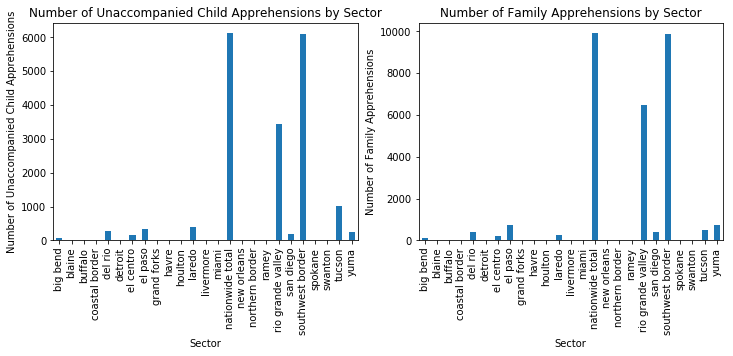

In [18]:
# 1. Set up the figure to plot two bar charts and specify size ratio (3:1)
plt.figure(figsize=(12,4))

# 2. the plt.subplot() function divides the main figure into rows and columns
#    121 = 1 row 2 columns and the first slot
plt.subplot(121)

# use the region mean data to plot a bar chart and add labels
region_uca_means.plot(kind='bar')
plt.xlabel('Sector')
plt.ylabel('Number of Unaccompanied Child Apprehensions')
plt.title('Number of Unaccompanied Child Apprehensions by Sector')

# 3. the plt.subplot() function divides the main figure into rows and columns
#    122 = 1 row 2 columns and the second slot
plt.subplot(122)

# use the region mean data to plot a bar chart and add labels
region_fa_means.plot(kind='bar')
plt.xlabel('Sector')
plt.ylabel('Number of Family Apprehensions')
plt.title('Number of Family Apprehensions by Sector');

* this plot isn't super clean (I should make new dataframes/subsets of family, unaccompanied child, and total apprehensions by sector for each year) but the graph above serves the purpose to give an idea of where the most family and unaccompanied minor apprehensions are occuring. It shows that for family apprehensions, the Rio Grande valley has the most, followed by El Paso and Yuma. For unaccompanied minors, the Rio Grande valley has the most, followed by Tucson. 

# FB

* So which sector points do you think you will focus on?

* Add subheading for next data frame

In [19]:
sw_deaths_df = pd.read_csv('../data/southwest_border_deaths_1998_2018.csv')

In [20]:
sw_deaths_df.shape

(210, 3)

In [21]:
sw_deaths_df.head()


,sector,fiscal_year,deaths
0,big bend,2018,10
1,del rio,2018,24
2,el centro,2018,17
3,el paso,2018,4
4,laredo,2018,69


In [22]:
sw_deaths_df

,sector,fiscal_year,deaths
0,big bend,2018,10
1,del rio,2018,24
2,el centro,2018,17
3,el paso,2018,4
4,laredo,2018,69
...,...,...,...
205,rio grande valley,1998,26
206,san diego,1998,44
207,tucson,1998,11
208,yuma,1998,17


In [23]:
sw_deaths_df['fiscal_year'].value_counts()


2018    10
2007    10
1999    10
2000    10
2001    10
2002    10
2003    10
2004    10
2005    10
2006    10
2008    10
2017    10
2009    10
2010    10
2011    10
2012    10
2013    10
2014    10
2015    10
2016    10
1998    10
Name: fiscal_year, dtype: int64

In [24]:
sw_deaths_df['fiscal_year'].nunique()


21

* ten sectors over 21 years(1998-2018)

In [25]:
sw_deaths_df['fiscal_year']


0      2018
1      2018
2      2018
3      2018
4      2018
       ... 
205    1998
206    1998
207    1998
208    1998
209    1998
Name: fiscal_year, Length: 210, dtype: int64

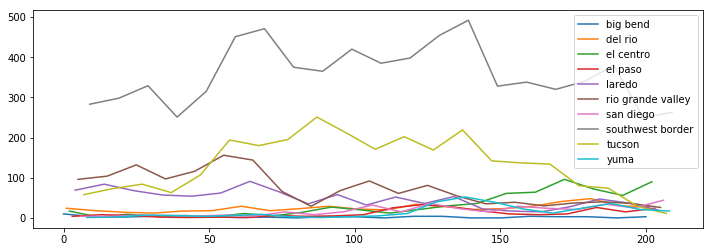

In [26]:
sw_deaths_df=sw_deaths_df.sort_values(by='fiscal_year')
tsplot=sw_deaths_df.groupby('sector')['deaths'].plot(x='fiscal_year', figsize=(12,4), legend=True)

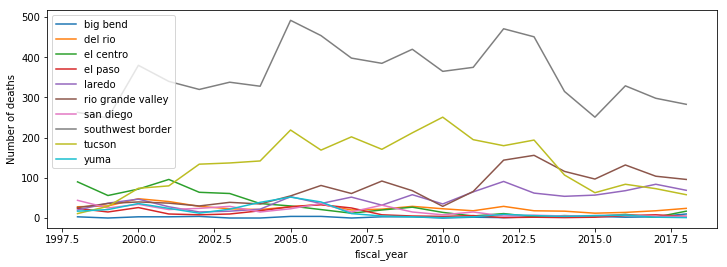

In [39]:
sw_deaths_df.index = sw_deaths_df['fiscal_year'].astype(int)
sw_deaths_plot=sw_deaths_df.groupby('sector')['deaths'].plot(figsize=(12,4), 
                                                     legend=True, ylabel='Number of deaths')

* temporal graph showing increases/decreases in migrant border deaths by southwest border crossing sectors over fiscal year. 
* temporal graph shows Tucson sector has the most deaths over time, but this has decreased after 2010. Rio Grande Valley has had in increase in migrant deaths, spiking after 2010 and then decreasing in 2015 but still increasing gradually since then. Del Rio, Big Bend and El Paso had the least amount of deaths over time, with all being constant and close to 0. 

In [28]:
bp_staffing_df = pd.read_csv('../data/border_patrol_staffing_1992_2018.csv')


In [29]:
bp_staffing_df.shape

(675, 3)

In [30]:
bp_staffing_df.columns

Index(['sector', 'fiscal_year', 'number_of_agents'], dtype='object')

In [31]:
bp_staffing_df

,sector,fiscal_year,number_of_agents
0,big bend,2018,499.0
1,blaine,2018,295.0
2,buffalo,2018,285.0
3,coastal border,2018,248.0
4,del rio,2018,1366.0
...,...,...,...
670,southwest border,1992,3555.0
671,spokane,1992,35.0
672,swanton,1992,68.0
673,tucson,1992,300.0


* border patrol staff numbers (in number of agents) by sector (including northern and coastal sectors) by fiscal year. since we only want the southwest sectors, maybe we clean up the data and create a new data frame with only southwest sectors. 

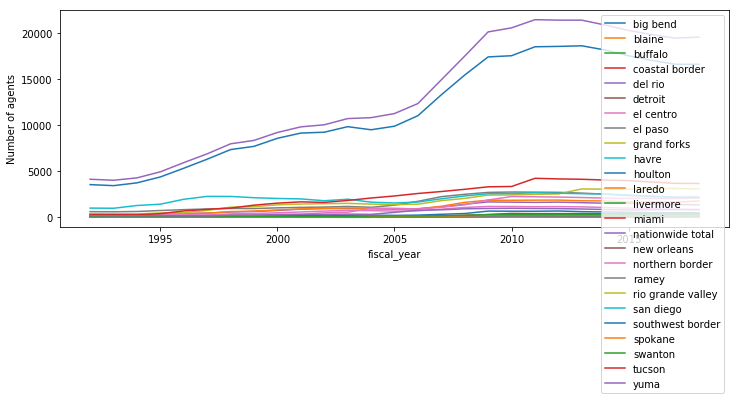

In [32]:
bp_staffing_df.index = bp_staffing_df['fiscal_year'].astype(int)
tsplot=bp_staffing_df.groupby('sector')['number_of_agents'].plot(figsize=(12,4), 
                                                     legend=True, ylabel='Number of agents')

* wow: Big Bend and Del Rio (both southwest border crossing checkpoints) had a huge spike in border agents in 2005. Curious as to why these two had such a major spike and all other border crossing checkpoints number of agents have been pretty constant. 

* need to clean up graph by deleting nationwide total, northern border, southwest border and coastal border rows 

In [33]:
pp_df=pd.read_csv('../data/political_party_by_year_1963_2019.csv')


In [53]:
pp_df

,year,political_party,president
0,1963,Democrat,Johnson
1,1964,Democrat,Johnson
2,1965,Democrat,Johnson
3,1966,Democrat,Johnson
4,1967,Democrat,Johnson
5,1968,Democrat,Johnson
6,1969,Democrat,Johnson
7,1970,Republican,Nixon
8,1971,Republican,Nixon
9,1972,Republican,Nixon


In [54]:
pp_df.columns

Index(['year', 'political_party ', 'president'], dtype='object')

In [55]:
# see space in political_party name
pp_df=pp_df.rename(columns={'political_party ': 'political_party'})

# FB

* Your data goes back to early 1990s at the earliest (for staffing) but in 2000s for the apprehensions. So how do you want to combine that with these data?


* You should make some comments about how you intend to combine or compare the different datasources and the range of common and different dimensions (year and sector points).



sector
big bend             AxesSubplot(0.125,0.125;0.775x0.755)
del rio              AxesSubplot(0.125,0.125;0.775x0.755)
el centro            AxesSubplot(0.125,0.125;0.775x0.755)
el paso              AxesSubplot(0.125,0.125;0.775x0.755)
laredo               AxesSubplot(0.125,0.125;0.775x0.755)
rio grande valley    AxesSubplot(0.125,0.125;0.775x0.755)
san diego            AxesSubplot(0.125,0.125;0.775x0.755)
southwest border     AxesSubplot(0.125,0.125;0.775x0.755)
tucson               AxesSubplot(0.125,0.125;0.775x0.755)
yuma                 AxesSubplot(0.125,0.125;0.775x0.755)
Name: deaths, dtype: object

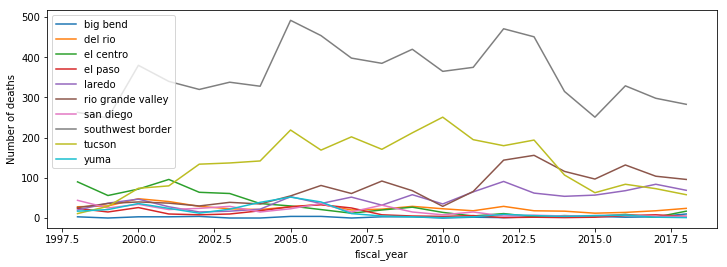

In [43]:
sw_deaths_df.groupby('sector')['deaths'].plot(figsize=(12,4), 
                                                     legend=True, ylabel='Number of deaths')



In [44]:
sw_deaths_df['fiscal_year'].min()

1998

# FB

* Here's one idea for looking at the party affiliation by year and some of the data


In [56]:
party_df = pp_df[pp_df['year']>=1998]

In [63]:
party2col = {'Democrat': 'blue', 'Republican': 'red'}
party_df['party_color']=party_df['political_party'].map(party2col)
party_df['y']=500

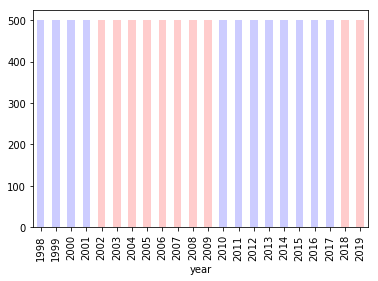

In [68]:
party_df.plot(kind='bar', x='year', y='y', color=party_df['party_color'], legend=False, alpha=0.2)

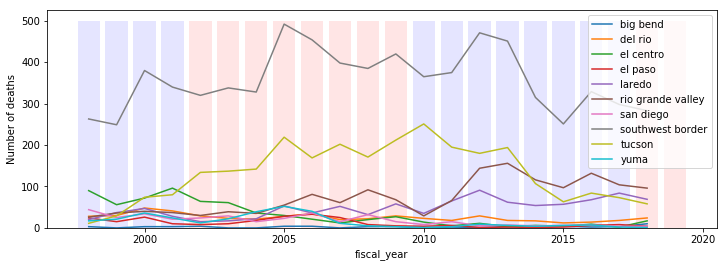

In [91]:
plt.figure(figsize=(12,4))
plt.bar(x=party_df['year'], height=party_df['y'], 
              color=party_df['party_color'], 
              alpha=0.1)

splot=sw_deaths_df.groupby('sector')['deaths'].plot( 
                                            legend=True, ylabel='Number of deaths')





* Your question:
> If I wanted to do a correlation between border staffing and migrant deaths over time, how could I make a graph for it?


* STEPS:

  1. look for the common columns between the two data frames

In [2]:
sw_deaths_df.head()

NameError: name 'sw_deaths_df' is not defined

In [94]:
bp_staffing_df.head()

,sector,fiscal_year,number_of_agents
fiscal_year,,,
2018,big bend,2018,499.0
2018,blaine,2018,295.0
2018,buffalo,2018,285.0
2018,coastal border,2018,248.0
2018,del rio,2018,1366.0


2. drop the columns `fiscal_year` in both data frames as you have that as the index.

In [100]:
sw_deaths_df=sw_deaths_df.drop(columns='fiscal_year')
bp_staffing_df=bp_staffing_df.drop(columns='fiscal_year')

3. Merge using `fiscal_year` and `sector`

In [102]:
sw_deaths_and_staffing_df=pd.merge(
         sw_deaths_df,    # pointer to the left data frame
         bp_staffing_df,  # pointer to the right data frame
         on = ['fiscal_year', 'sector'] # columns to match the two dfs on
        )

In [103]:
sw_deaths_and_staffing_df

,sector,deaths,number_of_agents
fiscal_year,,,
1998,southwest border,263,7357.0
1998,big bend,3,164.0
1998,del rio,28,589.0
1998,el centro,90,383.0
1998,el paso,24,972.0
...,...,...,...
2018,laredo,69,1779.0
2018,el paso,4,2171.0
2018,el centro,17,844.0


In [116]:
sw_death_staff_corr=sw_deaths_and_staffing_df.groupby('sector')[['deaths','number_of_agents']].corr().unstack()

In [121]:
# this gives you a data frame with duplicate information in 
# so use column selection to get out one column of correlation values
sw_death_staff_corr

deaths                  number_of_agents                 
                  deaths number_of_agents           deaths number_of_agents
sector                                                                     
big bend             1.0         0.106390         0.106390              1.0
del rio              1.0        -0.575951        -0.575951              1.0
el centro            1.0        -0.796057        -0.796057              1.0
el paso              1.0        -0.608264        -0.608264              1.0
laredo               1.0         0.681970         0.681970              1.0
rio grande valley    1.0         0.790147         0.790147              1.0
san diego            1.0        -0.479935        -0.479935              1.0
southwest border     1.0         0.182772         0.182772              1.0
tucson               1.0         0.345957         0.345957              1.0
yuma                 1.0        -0.618931        -0.618931              1.0

In [122]:
sw_death_staff_corr['deaths']['number_of_agents']

sector
big bend             0.106390
del rio             -0.575951
el centro           -0.796057
el paso             -0.608264
laredo               0.681970
rio grande valley    0.790147
san diego           -0.479935
southwest border     0.182772
tucson               0.345957
yuma                -0.618931
Name: number_of_agents, dtype: float64

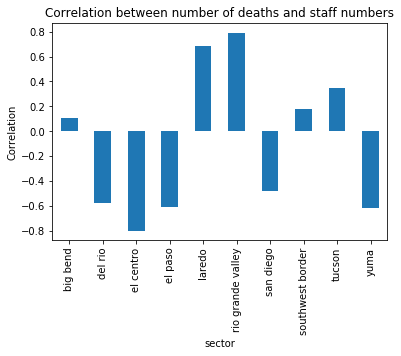

In [126]:
sw_death_staff_correlation = sw_death_staff_corr['deaths']['number_of_agents']
sw_death_staff_correlation.plot(kind='bar', ylabel='Correlation',
                                title='Correlation between number of deaths and staff numbers')